###  Missing Values
 - Missing values occurs in dataset when some of the informations is not stored for a variable There are 3 mechanisms
 
### 1 Missing Completely at Random, MCAR:
<br> - Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.</br>

<br>- For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.</br>

### 2. Missing at Random MAR:
<br>- Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.

Here are a few examples of missing at random:

- Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

- Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.</br>

### 3. Missing data not at random (MNAR)
<br>- It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.</br>

<br> - For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.<br> 

### 4. Random Sample Imputation

### Import Libraries 

In [2]:
import seaborn as sns 
import numpy as np
import pandas as pd 

In [17]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.shape

(891, 12)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check missing value in data set

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# caluculate how many null value present in particular column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

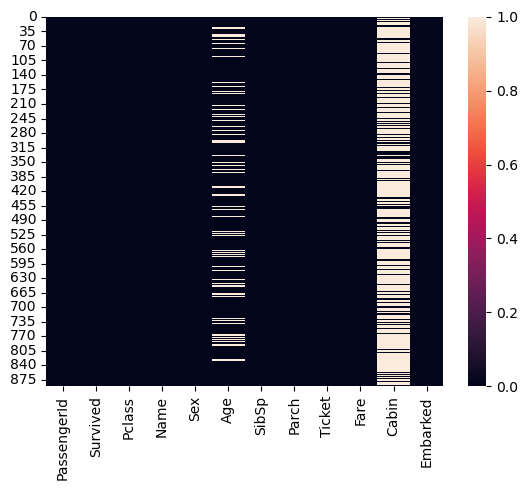

In [6]:
# check null prsent in data set visvalization

sns.heatmap(df.isnull())

### Handling of misssing values 

In [18]:
# 1. Delation of NaN values by delateting rows that contain missing values 

df.dropna()
df.dropna().shape

(183, 12)

In [21]:
# 1. Delation of NaN values by delateting columns that contain missing values 

df.dropna(axis = 1)
df.dropna(axis = 1).shape

(891, 9)

## Imputation Techniques

### 1.mean imputation Techniques  = thses techique work well when data set is normally distributed 

<Axes: xlabel='Age', ylabel='Count'>

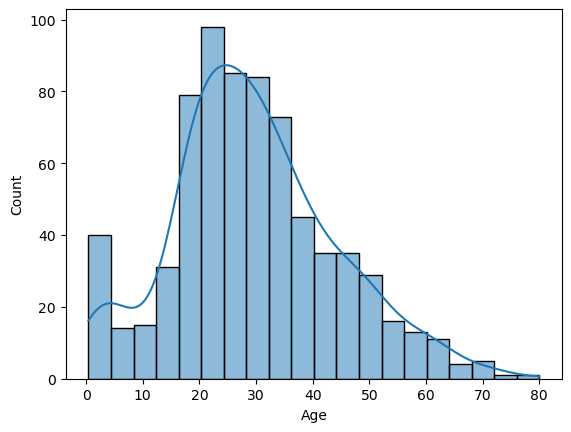

In [8]:
sns.histplot(df['Age'],kde = True)

In [9]:
df['age_mean'] = df['Age'].fillna(df['Age'].mean())

df[['age_mean' ,'Age']]

,age_mean,Age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='age_mean', ylabel='Count'>

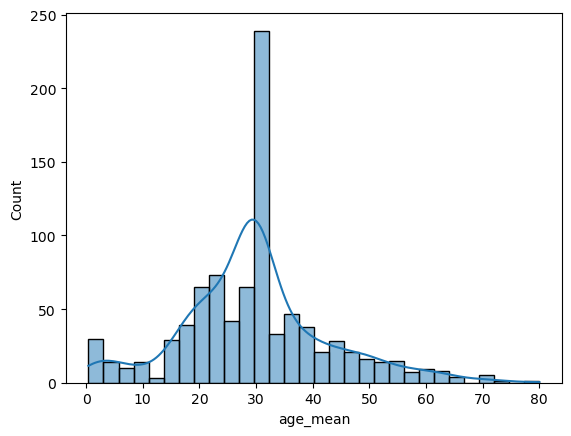

In [10]:
sns.histplot(df['age_mean'] ,kde = True)

### 2.Median Imputaion Techniques = this techniques work well when dataset contain outliers i.e skewed data


<Axes: >

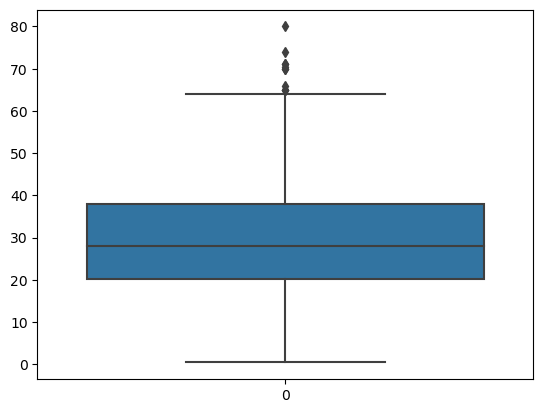

In [19]:
sns.boxplot(df['Age'] )

In [41]:

df['age_median'] = df['Age'].fillna(df['Age'].median())
df[['age_median' ,'age_mean' , 'Age']]


,age_median,age_mean,Age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3.mode value imputation=  categorical Ferture 

### Method.1 

In [29]:
import pandas as pd

data = {
    'emp_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'name': ['John', 'Emma', 'Michael', 'Sophia', 'William', 'Olivia', 'James', 'Amelia', 'Alexander', 'Charlotte'],
    'dep': ['HR', 'IT', np.nan, 'IT', 'Operations', 'Sales', 'HR', 'Finance', 'IT', 'Marketing'],
    'age': [30, 35, 28, 40, 32, 29, np.nan, 36, 31, 37],
    'gender': [np.nan, 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df1 = pd.DataFrame(data)



In [30]:
df1

,emp_id,name,dep,age,gender
0,101,John,HR,30.0,NaN
1,102,Emma,IT,35.0,Female
2,103,Michael,NaN,28.0,Male
3,104,Sophia,IT,40.0,Female
4,105,William,Operations,32.0,Male
5,106,Olivia,Sales,29.0,Female
6,107,James,HR,NaN,Male
7,108,Amelia,Finance,36.0,Female
8,109,Alexander,IT,31.0,Male
9,110,Charlotte,Marketing,37.0,Female


In [31]:
df1['dep'].value_counts()

IT            3
HR            2
Operations    1
Sales         1
Finance       1
Marketing     1
Name: dep, dtype: int64

In [32]:
df1['dep']= df1['dep'].fillna('IT')

In [33]:
df1['dep'].isnull().sum()

0

###  Method- 2

In [21]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [23]:
# check unique value in Embarked column
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [24]:
# skip all NaN rows 
print(df['Age'].notna())

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool


In [25]:
# calculate mode of Embarked column 
mode = df[df['Age'].notna()]['Embarked'].mode()[0]
print(mode)

S


In [26]:
## fill mode in thses missing place of embarked column 
df['Embarked_mode'] = df['Embarked'].fillna(mode)

print(df[['Embarked_mode' ,'Embarked']])

    Embarked_mode Embarked
0               S        S
1               C        C
2               S        S
3               S        S
4               S        S
..            ...      ...
886             S        S
887             S        S
888             S        S
889             C        C
890             Q        Q

[891 rows x 2 columns]


### 4. Backword / Forward fill

### 5. SimpleImputer

- When using the SimpleImputer method from scikit-learn to handle missing values, you can specify different strategies to impute the missing values. The strategy parameter determines how the missing values will be replaced. The available strategies are:

1. 'mean': Replaces missing values with the mean along the axis.
2. 'median': Replaces missing values with the median along the axis.
3. 'most_frequent': Replaces missing values with the most frequent value along the axis.
4. 'constant': Replaces missing values with a constant value specified by the fill_value parameter.

In [11]:
import pandas as pd

data = {
    'emp_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'name': ['John', 'Emma', 'Michael', 'Sophia', 'William', 'Olivia', 'James', 'Amelia', 'Alexander', 'Charlotte'],
    'dep': ['HR', 'IT', np.nan, 'IT', 'Operations', 'Sales', 'HR', 'Finance', 'IT', 'Marketing'],
    'age': [30, 35, 28, 40, 32, 29, np.nan, 36, 31, 37],
    'gender': [np.nan, 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df = pd.DataFrame(data)



In [12]:
df.isnull().sum()

emp_id    0
name      0
dep       1
age       1
gender    1
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

sim_num = SimpleImputer(missing_values = np.nan , strategy = 'mean')  
sim_cat = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') # mode


In [22]:
# fill missing value in Numeric Column

age_imp = sim_num.fit_transform(df[['age']])

In [23]:
df['dep'].value_counts()

IT            3
HR            2
Operations    1
Sales         1
Finance       1
Marketing     1
Name: dep, dtype: int64

In [24]:
## fill missing value in Categorical Column 

dep_imp = sim_cat.fit_transform(df[['dep']])

In [25]:
gen_imp = sim_cat.fit_transform(df[['gender']])

In [27]:
df.isnull().sum()

emp_id    0
name      0
dep       1
age       1
gender    1
dtype: int64

In [37]:
# Create DataFrame A using the imputed values
df_ = pd.DataFrame({
    'emp_id' : df['emp_id'],
    'name' : df['name'],
    'age': age_imp.flatten(),
    'dep': dep_imp.flatten(),
    'gender': gen_imp.flatten()
})

df_

,emp_id,name,age,dep,gender
0,101,John,30.000000,HR,Female
1,102,Emma,35.000000,IT,Female
2,103,Michael,28.000000,IT,Male
3,104,Sophia,40.000000,IT,Female
4,105,William,32.000000,Operations,Male
5,106,Olivia,29.000000,Sales,Female
6,107,James,33.111111,HR,Male
7,108,Amelia,36.000000,Finance,Female
8,109,Alexander,31.000000,IT,Male
9,110,Charlotte,37.000000,Marketing,Female


In [39]:
df_.isnull().sum()

emp_id    0
name      0
age       0
dep       0
gender    0
dtype: int64

### 6.KNN Imputer  

https://youtu.be/-fK-xEev2I8

### 7. Missingindicater
https://youtu.be/a38ehxv3kyk

### 8. MissinIndiator

https://youtu.be/Ratcir3p03w